# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
import json
import sys
import datetime



# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
# tuples 
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
# creating 1500 values between the two locations of  -90 and 90
# zip is how you access tuples 
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    #print(lat_lng)
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


# there arent 1500 listed bc the dups are not appended into the cities []


Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1  # Update this line to reset record_count to 1 in each set

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Response to get requests from openweather api
        response = requests.get(city_url)
       
        # Parse the JSON and retrieve data
        city_weather = response.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["name"]
        city_date =  city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except Exception as e:
        continue
        
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

# Print the city_data list to verify the data
print(city_data)

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | illoqqortoormiut
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | teya
Processing Record 9 of Set 1 | oruro
Processing Record 10 of Set 1 | qeshm
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | klaksvik
Processing Record 13 of Set 1 | mys shmidta
Processing Record 14 of Set 1 | montepuez
Processing Record 15 of Set 1 | kaitangata
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | cacoal
Processing Record 18 of Set 1 | ahipara
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | mahebourg
Processing Record 22 of Set 1 | gokak
Processing Record 23 of Set 1 | ushtobe
Processing Record

Processing Record 50 of Set 4 | sahrak
Processing Record 1 of Set 5 | kysyl-syr
Processing Record 2 of Set 5 | komsomolskiy
Processing Record 3 of Set 5 | husavik
Processing Record 4 of Set 5 | nuuk
Processing Record 5 of Set 5 | dingle
Processing Record 6 of Set 5 | qui nhon
Processing Record 7 of Set 5 | marcona
Processing Record 8 of Set 5 | tabou
Processing Record 9 of Set 5 | dayong
Processing Record 10 of Set 5 | fairbanks
Processing Record 11 of Set 5 | georgetown
Processing Record 12 of Set 5 | foggia
Processing Record 13 of Set 5 | kulhudhuffushi
Processing Record 14 of Set 5 | vicuna
Processing Record 15 of Set 5 | ancud
Processing Record 16 of Set 5 | mykhaylivka
Processing Record 17 of Set 5 | krym
Processing Record 18 of Set 5 | ibra
Processing Record 19 of Set 5 | sentyabrskiy
Processing Record 20 of Set 5 | cidreira
Processing Record 21 of Set 5 | kavieng
Processing Record 22 of Set 5 | ukiah
Processing Record 23 of Set 5 | kolpny
Processing Record 24 of Set 5 | zhanaoze

Processing Record 50 of Set 8 | rush
Processing Record 1 of Set 9 | bengkulu
Processing Record 2 of Set 9 | coquimbo
Processing Record 3 of Set 9 | magadan
Processing Record 4 of Set 9 | shelburne
Processing Record 5 of Set 9 | verkhoyansk
Processing Record 6 of Set 9 | salalah
Processing Record 7 of Set 9 | saharsa
Processing Record 8 of Set 9 | asau
Processing Record 9 of Set 9 | payo
Processing Record 10 of Set 9 | college
Processing Record 11 of Set 9 | concarneau
Processing Record 12 of Set 9 | vilvoorde
Processing Record 13 of Set 9 | pangnirtung
Processing Record 14 of Set 9 | yerbogachen
Processing Record 15 of Set 9 | grindavik
Processing Record 16 of Set 9 | honghu
Processing Record 17 of Set 9 | porto nacional
Processing Record 18 of Set 9 | vilani
Processing Record 19 of Set 9 | grimari
Processing Record 20 of Set 9 | sola
Processing Record 21 of Set 9 | arbroath
Processing Record 22 of Set 9 | lakes entrance
Processing Record 23 of Set 9 | pierre
Processing Record 24 of Se

Processing Record 47 of Set 12 | port macquarie
Processing Record 48 of Set 12 | rosarito
Processing Record 49 of Set 12 | bereda
Processing Record 50 of Set 12 | rundu
Processing Record 1 of Set 13 | muzhi
Processing Record 2 of Set 13 | roma
-----------------------------
Data Retrieval Complete
-----------------------------
[{'City': 'vaini', 'Lat': -21.2, 'Lng': -175.2, 'Max Temp': 24.09, 'Humidity': 78, 'Cloudiness': 75, 'Wind Speed': 4.12, 'Country': 'Vaini', 'Date': 1684893724}, {'City': 'cape town', 'Lat': -33.9258, 'Lng': 18.4232, 'Max Temp': 15.21, 'Humidity': 78, 'Cloudiness': 0, 'Wind Speed': 5.14, 'Country': 'Cape Town', 'Date': 1684893600}, {'City': 'qaanaaq', 'Lat': 77.484, 'Lng': -69.3632, 'Max Temp': -5.59, 'Humidity': 90, 'Cloudiness': 100, 'Wind Speed': 2.89, 'Country': 'Qaanaaq', 'Date': 1684893726}, {'City': 'atuona', 'Lat': -9.8, 'Lng': -139.0333, 'Max Temp': 27.44, 'Humidity': 74, 'Cloudiness': 75, 'Wind Speed': 2.64, 'Country': 'Atuona', 'Date': 1684893726}, {'Ci

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [5]:

# NOTES on code above 

# The line of code you provided is constructing an endpoint URL for querying weather data based on a city. Here's an explanation of each component:

# city_url: This variable is being initialized to store the constructed endpoint URL.
# url: It is assumed that url is a base URL for accessing weather data from an API.
# city: This represents the name of a city for which you want to retrieve weather data.
# The construction of city_url involves the following steps:

# city.replace(" ", "+"): This code replaces any spaces in the city name with the + symbol. It is a common practice in URL encoding to replace spaces with + or %20.
# url + "&q=" + city.replace(" ", "+"): Here, the base url is concatenated with the query parameter &q= and the modified city name. This forms the complete endpoint URL for querying weather data for a specific city.
# By replacing spaces with + and concatenating the components, the resulting city_url is ready to be used as an endpoint to request weather data for the desired city.

# By using continue within the except block, you effectively skip the remaining code within that iteration and move on to the next city in the loop. This way, the error message is not printed, and the loop continues with the next city in the list.

# Please note that this approach will only skip printing the error message, but it will not suppress the exception itself. If you want to completely ignore the exception without any output, you can leave the except block empty, like this:

# In this case, the except block does not have any code inside it, and it will silently ignore the exception and move on to the next city.


In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.2000,-175.2000,24.09,78,75,4.12,Vaini,1684893724
1,cape town,-33.9258,18.4232,15.21,78,0,5.14,Cape Town,1684893600
2,qaanaaq,77.4840,-69.3632,-5.59,90,100,2.89,Qaanaaq,1684893726
3,atuona,-9.8000,-139.0333,27.44,74,75,2.64,Atuona,1684893726
4,rikitea,-23.1203,-134.9692,25.02,87,10,7.21,Rikitea,1684893727


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-21.2000,-175.2000,24.09,78,75,4.12,Vaini,1684893724
1,cape town,-33.9258,18.4232,15.21,78,0,5.14,Cape Town,1684893600
2,qaanaaq,77.4840,-69.3632,-5.59,90,100,2.89,Qaanaaq,1684893726
3,atuona,-9.8000,-139.0333,27.44,74,75,2.64,Atuona,1684893726
4,rikitea,-23.1203,-134.9692,25.02,87,10,7.21,Rikitea,1684893727


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

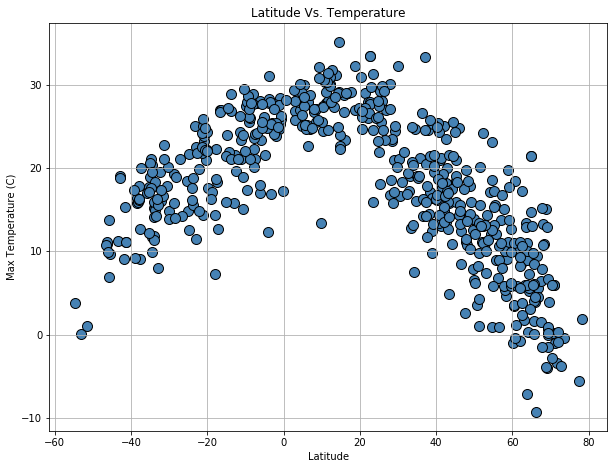

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolor="steelblue", edgecolor="black", s=100)


# Increase the size of the chart by 30%
fig = plt.gcf()
fig.set_size_inches(10, 7.5)  # Adjust the width and height as desired
# Incorporate the other graph properties


# Incorporate the other graph properties
plt.title("Latitude Vs. Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)



# Save the figure
plt.savefig("output/lat_temp_Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

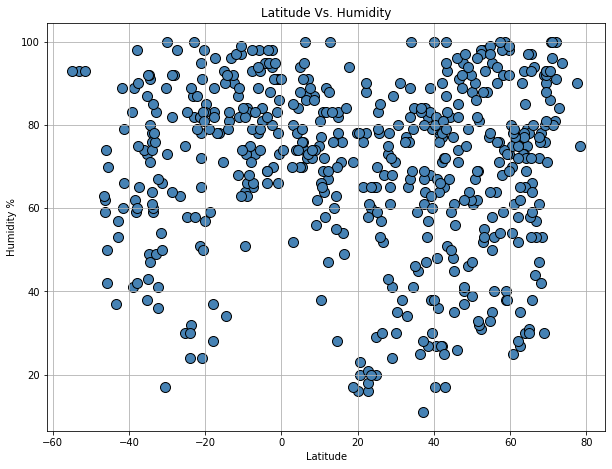

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolor="steelblue", edgecolor="black", s=100)


# Increase the size of the chart by 30%
fig = plt.gcf()
fig.set_size_inches(10, 7.5)  # Adjust the width and height as desired
# Incorporate the other graph properties


# Incorporate the other graph properties
plt.title("Latitude Vs. Humidity")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output/lat_hum_Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

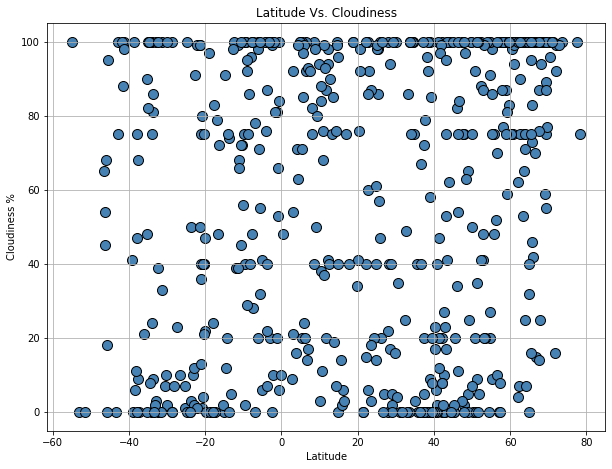

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolor="steelblue", edgecolor="black", s=100)


# Increase the size of the chart by 30%
fig = plt.gcf()
fig.set_size_inches(10, 7.5)  # Adjust the width and height as desired
# Incorporate the other graph properties


# Incorporate the other graph properties
plt.title("Latitude Vs. Cloudiness")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/lat_cloud_Fig3.png")


# Show plot
plt.show()



#### Latitude vs. Wind Speed Plot

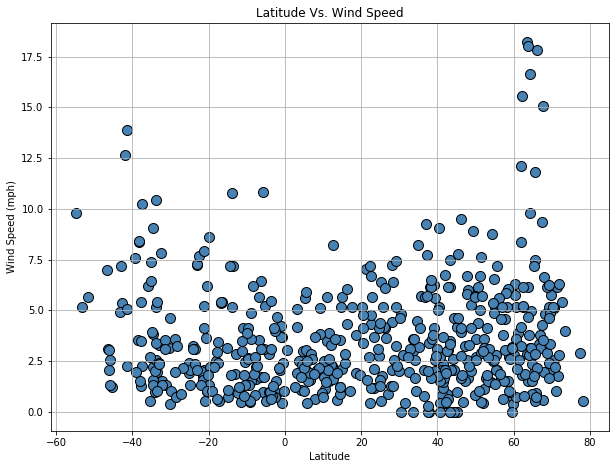

In [12]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolor="steelblue", edgecolor="black", s=100)


# Increase the size of the chart by 30%
fig = plt.gcf()
fig.set_size_inches(10, 7.5)  # Adjust the width and height as desired
# Incorporate the other graph properties
# YOUR CODE HERE

# Incorporate the other graph properties
plt.title("Latitude Vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output/lat_wind_Fig4.png")


# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,qaanaaq,77.4840,-69.3632,-5.59,90,100,2.89,Qaanaaq,1684893726
6,teya,60.3778,92.6267,3.43,70,98,5.76,Teya,1684893727
8,qeshm,26.9581,56.2719,26.93,68,5,0.87,Qeshm,1684893728
10,klaksvik,62.2266,-6.5890,8.51,75,7,15.57,Klaksvík,1684893740
17,jamestown,42.0970,-79.2353,16.80,77,0,0.45,Jamestown,1684893726


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-21.2000,-175.2000,24.09,78,75,4.12,Vaini,1684893724
1,cape town,-33.9258,18.4232,15.21,78,0,5.14,Cape Town,1684893600
3,atuona,-9.8000,-139.0333,27.44,74,75,2.64,Atuona,1684893726
4,rikitea,-23.1203,-134.9692,25.02,87,10,7.21,Rikitea,1684893727
5,mataura,-46.1927,168.8643,10.89,62,45,2.06,Mataura,1684893727


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7209780356092869


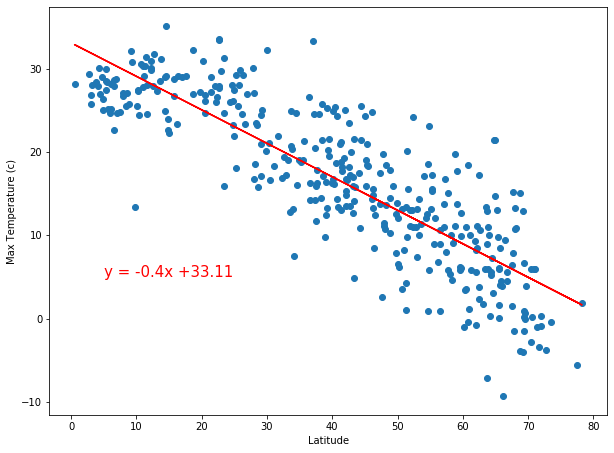

In [16]:
# Linear regression on Northern Hemisphere


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Get regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept
# print(regress_values)


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)


# Create Plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (c)')
plt.annotate(line_eq,(5,5),fontsize=15,color="red")

fig = plt.gcf()
fig.set_size_inches(10, 7.5)  # Adjust the width and height as desired

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


**Discussion about the linear relationship:** The correlation between the temp and lat is as the temp increase the lat decreases showing a negative correlation.  

The r-value is: 0.561696309194334


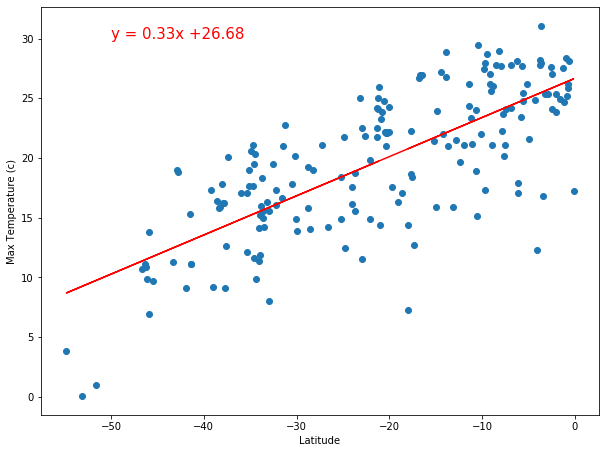

In [17]:
# Linear regression on Southern Hemisphere



(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Get regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept
# print(regress_values)


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)


# Create Plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (c)')
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

fig = plt.gcf()
fig.set_size_inches(10, 7.5)  # Adjust the width and height as desired

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


**Discussion about the linear relationship:** The correlation between the temp and lat is as the temp increase the lat increases showing a positive correlation.  

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.002793307493604226


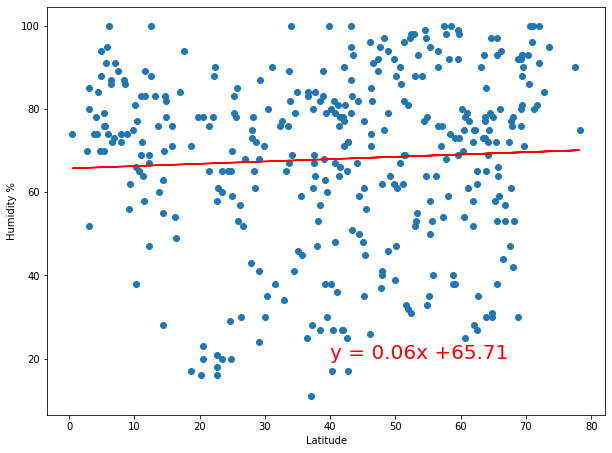

In [18]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Get regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept
# print(regress_values)


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)


# Create Plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.annotate(line_eq,(40,20),fontsize=20,color="red")

fig = plt.gcf()
fig.set_size_inches(10, 7.5)  # Adjust the width and height as desired

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


The r-value is: 0.0940563241007077


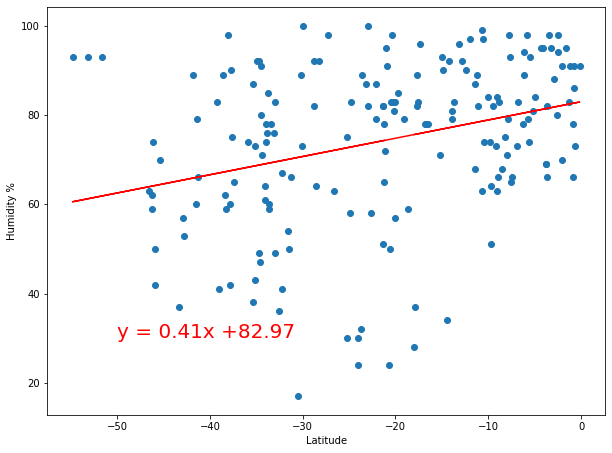

In [19]:
# Southern Hemisphere



(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Get regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept
# print(regress_values)


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)


# Create Plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.annotate(line_eq,(-50,30),fontsize=20,color="red")

fig = plt.gcf()
fig.set_size_inches(10, 7.5)  # Adjust the width and height as desired

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The correlation between the two r-values, 0.04150916171482019 and 0.01636182808664645, can be determined by comparing their signs. Since both r-values are positive, it indicates a positive correlation between the variables they represent. A positive correlation means that as one variable increases, the other variable tends to increase as well. However, the strength of the correlation is weak as both values are close to zero, suggesting a very weak positive correlation between the variables.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.02426102948717598


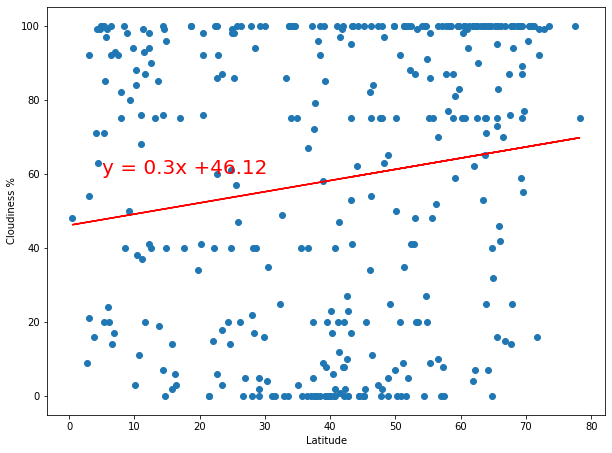

In [20]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Get regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept
# print(regress_values)


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)


# Create Plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.annotate(line_eq,(5,60),fontsize=20,color="red")

fig = plt.gcf()
fig.set_size_inches(10, 7.5)  # Adjust the width and height as desired

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.013498225278546992


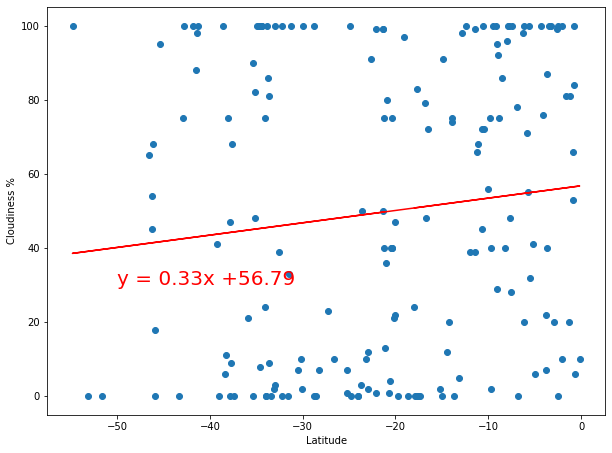

In [21]:
# Southern Hemisphere



(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Get regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept
# print(regress_values)


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq)


# Create Plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.annotate(line_eq,(-50,30),fontsize=20,color="red")

fig = plt.gcf()
fig.set_size_inches(10, 7.5)  # Adjust the width and height as desired

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The correlation between the two r-values, 0.03233093084508032 and 0.003370729537543321, can be determined by comparing their signs. Since both r-values are positive, it indicates a positive correlation between the variables they represent. However, the correlation is very weak as both values are close to zero. Therefore, while there is a positive correlation, it is extremely weak.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.041455153002163174


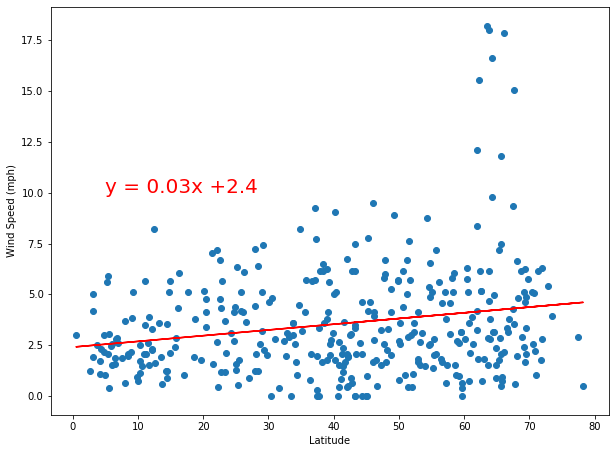

In [22]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Get regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept
# print(regress_values)


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)


# Create Plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(5,10),fontsize=20,color="red")

fig = plt.gcf()
fig.set_size_inches(10, 7.5)  # Adjust the width and height as desired

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

y = -0.05x +2.25
The r-value is: 0.07322118047233436


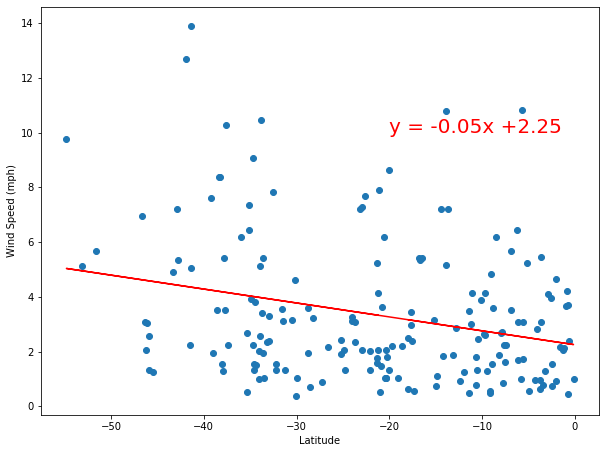

In [23]:
# Southern Hemisphere



(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Get regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept
# print(regress_values)


# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)


# Create Plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(-20,10),fontsize=20,color="red")

fig = plt.gcf()
fig.set_size_inches(10, 7.5)  # Adjust the width and height as desired

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The correlation between the two r-values, 0.06758693401497586 and 0.044733211084398504, can be determined by comparing their signs. Since both r-values are positive, it indicates a positive correlation between the variables they represent. However, the correlation is still relatively weak as both values are relatively close to zero. Therefore, while there is a positive correlation, it is still a weak correlation.